In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load the training and testing files
df_train=pd.read_csv('/content/train.csv')
df_test=pd.read_csv('/content/test (3).csv')

# Merge the dataframes
df = pd.concat([df_train, df_test], ignore_index=True)

print(df)

            ID Gender Has a car Has a property  Children count    Income  \
0      5037048      M         Y              Y               0  135000.0   
1      5044630      F         Y              N               1  135000.0   
2      5079079      F         N              Y               2  180000.0   
3      5112872      F         Y              Y               0  360000.0   
4      5105858      F         N              N               0  270000.0   
...        ...    ...       ...            ...             ...       ...   
36452  5115415      F         Y              Y               0  135000.0   
36453  5068826      F         Y              Y               0  157500.0   
36454  5026088      F         N              Y               0   67500.0   
36455  5142701      F         Y              N               0   95850.0   
36456  5022903      F         N              Y               1  135000.0   

          Employment status                Education level  \
0                   Worki

In [ ]:
df.shape


(36457, 20)

In [ ]:
df.drop(['ID','Job title','Has a mobile phone','Has a work phone','Has a phone'], axis=1, inplace=True)

In [ ]:
df['Is high risk'].value_counts(normalize=True) * 100


,proportion
Is high risk,
0,98.310338
1,1.689662


In [ ]:
df.isnull().sum()

,0
Gender,0
Has a car,0
Has a property,0
Children count,0
Income,0
Employment status,0
Education level,0
Marital status,0
Dwelling,0
Age,0


<Axes: >

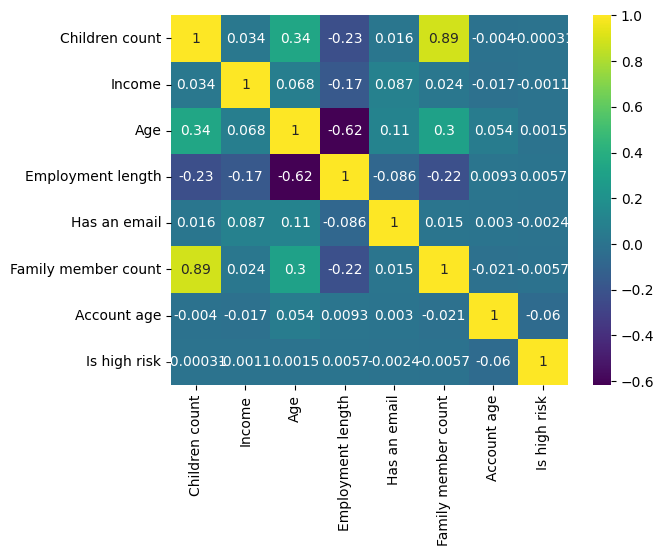

In [ ]:
import seaborn as sns
import pandas as pd

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix using only numeric columns
correlation_matrix = numeric_df.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")

In [ ]:
df['Gender_encoded'] = pd.factorize(df['Gender'])[0]
df['Has a car_encoded'] = pd.factorize(df['Has a car'])[0]
df['Has a property_encoded'] = pd.factorize(df['Has a property'])[0]



In [ ]:
df.drop(['Gender','Has a car','Has a property'], axis=1, inplace=True)

In [ ]:
df.head()

,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has an email,Family member count,Account age,Is high risk,Gender_encoded,Has a car_encoded,Has a property_encoded
0,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,0,2.0,-17.0,0,0,0,0
1,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,0,2.0,-1.0,0,1,0,1
2,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,0,4.0,-38.0,0,1,1,0
3,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,1.0,-11.0,0,1,0,0
4,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,0,1.0,-41.0,0,1,1,1


In [ ]:
# Calculate correlation between 'Marital status' and 'Dwelling'
# Convert 'Marital status' and 'Dwelling' to numerical representation using pd.factorize
# before calculating the correlation

# Convert 'Marital status' to numerical representation
df['Marital status_encoded'] = pd.factorize(df['Marital status'])[0]

# Convert 'Dwelling' to numerical representation if it's not already numerical
# Assuming 'Dwelling' might also be categorical
df['Dwelling_encoded'] = pd.factorize(df['Dwelling'])[0]

# Calculate correlation using the encoded columns
correlation = df['Marital status_encoded'].corr(df['Dwelling_encoded'])
print(correlation)

-0.003074961970198085


In [ ]:
df.drop(['Marital status','Dwelling'], axis=1, inplace=True)

In [ ]:
# Convert 'Employment status' and 'Education level' to numerical representations
# using pd.factorize or other encoding methods before calculating correlation.

# Example using pd.factorize:
df['Employment status_encoded'] = pd.factorize(df['Employment status'])[0]
df['Education level_encoded'] = pd.factorize(df['Education level'])[0]

# Now calculate the correlation using the encoded columns:
correlation = df['Employment status_encoded'].corr(df['Education level_encoded'])
print(correlation)

-0.0018160431045576577


In [ ]:
df.drop(['Employment status','Education level'], axis=1, inplace=True)

In [ ]:
df

,Children count,Income,Age,Employment length,Has an email,Family member count,Account age,Is high risk,Gender_encoded,Has a car_encoded,Has a property_encoded,Marital status_encoded,Dwelling_encoded,Employment status_encoded,Education level_encoded
0,0,135000.0,-16271,-3111,0,2.0,-17.0,0,0,0,0,0,0,0,0
1,1,135000.0,-10130,-1651,0,2.0,-1.0,0,1,0,1,1,1,1,1
2,2,180000.0,-12821,-5657,0,4.0,-38.0,0,1,1,0,0,1,1,0
3,0,360000.0,-20929,-2046,1,1.0,-11.0,0,1,0,0,1,1,1,1
4,0,270000.0,-16207,-515,0,1.0,-41.0,0,1,1,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,0,135000.0,-21724,-1351,0,2.0,-22.0,0,1,0,0,0,1,0,0
36453,0,157500.0,-14976,-3550,1,2.0,-42.0,0,1,0,0,0,1,0,1
36454,0,67500.0,-20482,-5030,0,1.0,-25.0,0,1,1,0,4,1,0,0
36455,0,95850.0,-18931,-6678,0,2.0,-49.0,0,1,0,1,0,1,1,0


In [ ]:
df.drop(['Employment length','Children count'], axis=1, inplace=True)

In [ ]:
df

,Income,Age,Has an email,Family member count,Account age,Is high risk,Gender_encoded,Has a car_encoded,Has a property_encoded,Marital status_encoded,Dwelling_encoded,Employment status_encoded,Education level_encoded
0,135000.0,-16271,0,2.0,-17.0,0,0,0,0,0,0,0,0
1,135000.0,-10130,0,2.0,-1.0,0,1,0,1,1,1,1,1
2,180000.0,-12821,0,4.0,-38.0,0,1,1,0,0,1,1,0
3,360000.0,-20929,1,1.0,-11.0,0,1,0,0,1,1,1,1
4,270000.0,-16207,0,1.0,-41.0,0,1,1,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,135000.0,-21724,0,2.0,-22.0,0,1,0,0,0,1,0,0
36453,157500.0,-14976,1,2.0,-42.0,0,1,0,0,0,1,0,1
36454,67500.0,-20482,0,1.0,-25.0,0,1,1,0,4,1,0,0
36455,95850.0,-18931,0,2.0,-49.0,0,1,0,1,0,1,1,0


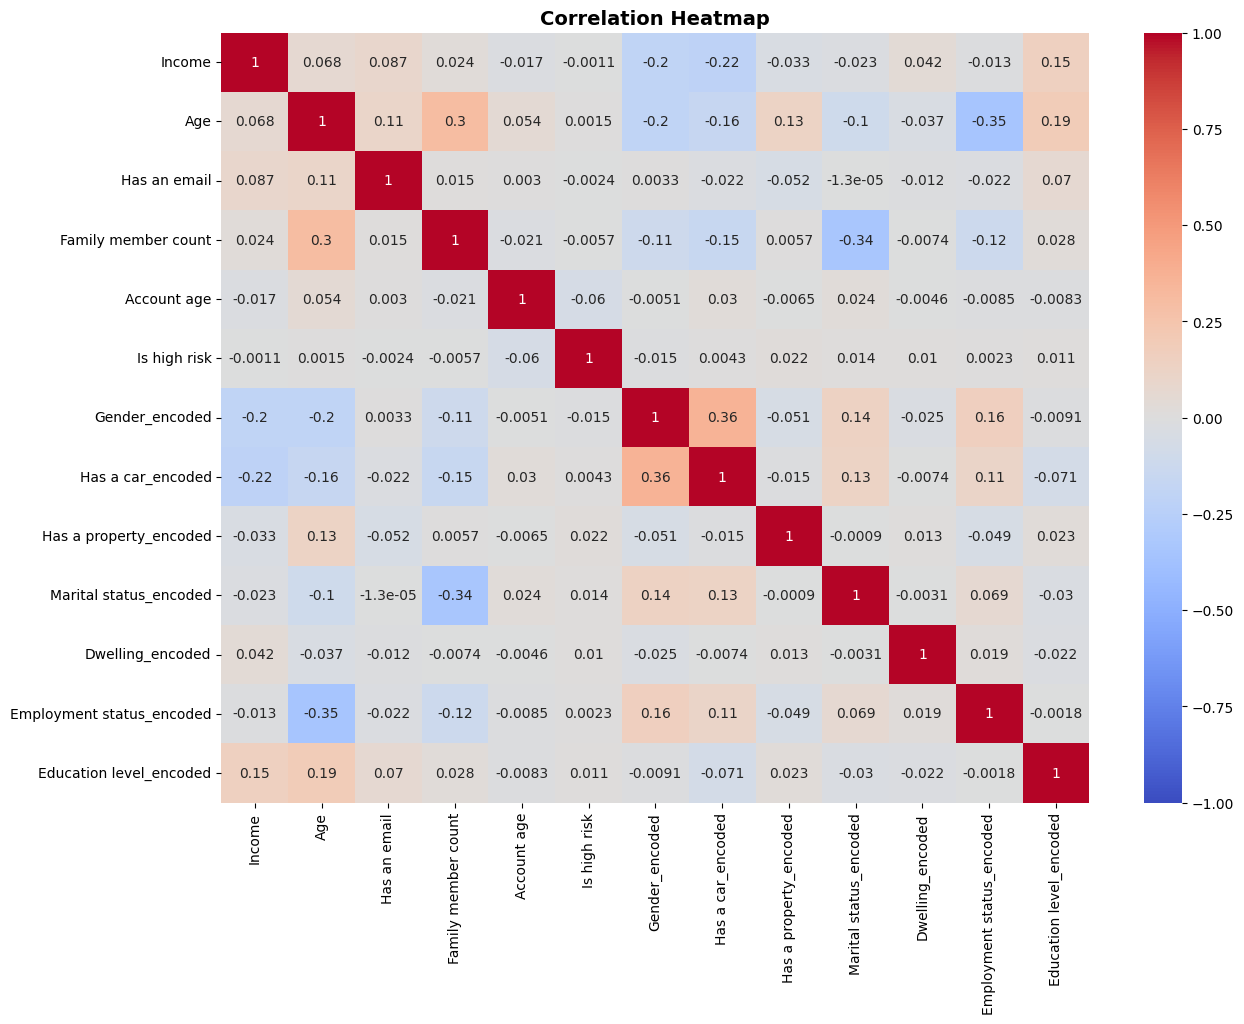

In [ ]:
# Plot correlation heatmap
import seaborn as sns
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(method='pearson', numeric_only=True),
            vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=14, weight='bold');

In [ ]:
# Isolate predictor variables
X= df.drop(columns = ['Is high risk'])

# Isolate target variable
y= df['Is high risk']

In [ ]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Display `X_train`
X_train.head()

,Income,Age,Has an email,Family member count,Account age,Gender_encoded,Has a car_encoded,Has a property_encoded,Marital status_encoded,Dwelling_encoded,Employment status_encoded,Education level_encoded
4418,225000.0,-15720,0,3.0,-11.0,1,1,0,0,1,1,1
1658,360000.0,-20354,0,2.0,-44.0,0,1,1,0,1,1,1
3915,135000.0,-9158,0,2.0,-20.0,0,0,1,0,0,0,0
16540,180000.0,-13467,0,2.0,-15.0,1,1,0,1,1,3,0
21309,157500.0,-14197,0,3.0,-40.0,1,1,0,1,1,0,0


In [ ]:
# Import the necessary class from scikit-learn
from sklearn.preprocessing import MinMaxScaler

# Normalize numerical features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Import the necessary class from scikit-learn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Import the necessary class from imbalanced-learn
!pip install imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
# Fit the model on X_train and y_train
model = LogisticRegression(penalty=None, max_iter=400) # Changed 'none' to None
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=400, penalty=None)

In [ ]:
# Generate predictions on X_test
y_pred = model.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.39      0.56      8961
           1       0.02      0.60      0.03       154

    accuracy                           0.40      9115
   macro avg       0.50      0.50      0.30      9115
weighted avg       0.97      0.40      0.55      9115



In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

# Load your dataset
df = pd.read_csv("your_data.csv")

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)  # Choose the desired number of components
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

# Visualize the results (if desired)
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization")
plt.show()